<a href="https://colab.research.google.com/github/vadhri/ai-notebook/blob/main/mlops/pistachio-dataset/Train_log.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# !wget https://raw.githubusercontent.com/wandb/edu/main/mlops-001/lesson1/requirements.txt
# !wget https://raw.githubusercontent.com/wandb/edu/main/mlops-001/lesson1/params.py
# !wget https://raw.githubusercontent.com/wandb/edu/main/mlops-001/lesson1/utils.py
# !pip install -qr requirements.txt

# from fastai.vision.all import *
# import params
import wandb


In [7]:
from zipfile import ZipFile
import pandas as pd
from scipy.io import arff



In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [12]:
# unzip the dataset,
!ls -larth /content/gdrive/MyDrive/Pistachio_Image_Dataset.zip
local_zip = '/content/gdrive/MyDrive/Pistachio_Image_Dataset.zip'
from fastai.vision.all import *

-rw------- 1 root root 27M Apr 13 02:04 /content/gdrive/MyDrive/Pistachio_Image_Dataset.zip


# Data visualization and upload


In [14]:
local_zip = Path('/content/gdrive/MyDrive/Pistachio_Image_Dataset.zip')
path = Path('/content/dataset')

if not path.exists():
    with ZipFile(local_zip, 'r') as zip_ref:
        zip_ref.extractall(path)

for item in path.ls()[0].ls():
  print (item)

/content/dataset/Pistachio_Image_Dataset/Pistachio_28_Features_Dataset
/content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt
/content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset
/content/dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset


In [15]:
ds_base_path = '/content/dataset/Pistachio_Image_Dataset/'
arff_path = ds_base_path + 'Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff'

print (f"\nBase path = {ds_base_path} \n ")
print (f"ARFF path = {arff_path} \n ")

arff_file = arff.loadarff(arff_path)
df = pd.DataFrame(arff_file[0])
df.head()



Base path = /content/dataset/Pistachio_Image_Dataset/ 
 
ARFF path = /content/dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/Pistachio_16_Features_Dataset.arff 
 


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391.0,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160.0,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,b'Kirmizi_Pistachio'
1,68358.0,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991.0,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,b'Kirmizi_Pistachio'
2,73589.0,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234.0,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,b'Kirmizi_Pistachio'
3,71106.0,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153.0,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,b'Kirmizi_Pistachio'
4,80087.0,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929.0,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,b'Kirmizi_Pistachio'


In [16]:
class1_path = os.path.join(ds_base_path, 'Pistachio_Image_Dataset/Kirmizi_Pistachio/')
class2_path = os.path.join(ds_base_path, 'Pistachio_Image_Dataset/Siirt_Pistachio/')

# Get all image file paths for each class
class1_images = [os.path.join(class1_path, f"kirmizi {i}.jpg") for i in range(1, 1233)]  # 1232 images in Kirmizi_Pistachio
class2_images = [os.path.join(class2_path, f"siirt {i}.jpg") for i in range(1, 917)]  # 916 images in Siirt_Pistachio

# Combine the image paths for both classes
image_paths = class1_images + class2_images

# Assuming the order in the DataFrame corresponds directly to the image order
df['image_paths'] = image_paths

# Check if the first image exists
print(f"Checking image path: {class1_images[0]}")
print(f"Checking image path: {class2_images[0]}")

Checking image path: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1.jpg
Checking image path: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio/siirt 1.jpg


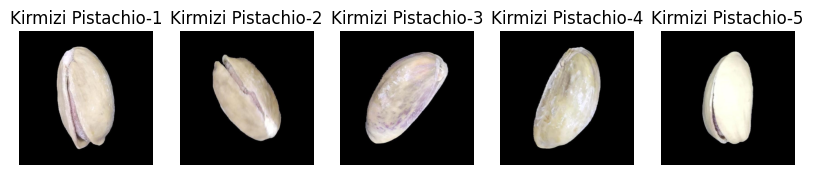

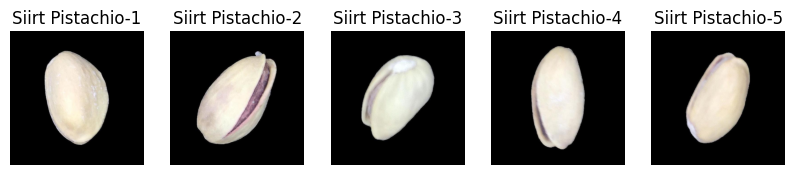

In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(10, 7))
    for i, image_path in enumerate(image_paths[:5]):
        img = mpimg.imread(image_path)
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.title(f"{title}-{i+1}")
        plt.axis('off')
    plt.show()


# Display 5 sample images from each class
display_images(class1_images, "Kirmizi Pistachio")
display_images(class2_images, "Siirt Pistachio")


In [18]:
run = wandb.init(project='pistachio-classification', entity=None, job_type="upload")
raw_data_at = wandb.Artifact("pistachio-image-classification", type="raw_data")


wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: vadhri-venkat to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


In [19]:
raw_data_at.add_file('/content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset_Request.txt', name='dataset_citation.txt')

ArtifactManifestEntry(path='dataset_citation.txt', digest='y2OTpLY2/FyFPvHbdGRVjQ==', size=5108, local_path='/root/.local/share/wandb/artifacts/staging/tmpe4b63qm1', skip_cache=False)

In [20]:
raw_data_at.add_dir('/content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/', name='images')
raw_data_at.add_dir('/content/dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset/', name='labels')

wandb: Adding directory to artifact (/content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset)... Done. 1.1s
wandb: Adding directory to artifact (/content/dataset/Pistachio_Image_Dataset/Pistachio_16_Features_Dataset)... Done. 0.0s


In [21]:
import wandb
from PIL import Image

# Create a WandB Table
table = wandb.Table(columns=list(df.columns) + ["image"])

# Iterate through the DataFrame and add rows to the table
for index, row in df.iterrows():
    image_path = row['image_paths']
    try:
      image = Image.open(image_path)
    except FileNotFoundError:
      print(f"Image not found: {image_path}")
      continue
    table.add_data(*row.values, wandb.Image(image))

raw_data_at.add(table, "eda_table")

# Log the table to Weights & Biases
wandb.log({"raw_data_table": table})


Image not found: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1168.jpg
Image not found: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1169.jpg
Image not found: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1170.jpg
Image not found: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1171.jpg
Image not found: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1172.jpg
Image not found: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1173.jpg
Image not found: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1174.jpg
Image not found: /content/dataset/Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/kirmizi 1175.jpg
Image not found: /content/dataset/Pistachio_Image_Dataset/Pistac

In [22]:
run.log_artifact(raw_data_at)


<Artifact pistachio-image-classification>

In [23]:
run.finish()

# Data prep

In [24]:
run = wandb.init(project='pistachio-classification', entity=None, job_type="data_split")

In [25]:
raw_data_at = run.use_artifact(f'pistachio-image-classification:latest')
path = Path(raw_data_at.download())

wandb: Downloading large artifact pistachio-image-classification:latest, 232.70MB. 4188 files... 
wandb:   4188 of 4188 files downloaded.  
Done. 0:0:19.9


In [26]:

import pandas as pd
from scipy.io import arff

# Assuming 'arff_path' is defined as in your previous code
arff_path = '/content/artifacts/pistachio-image-classification:v1/labels/Pistachio_16_Features_Dataset.arff'

# Load the ARFF file into a Pandas DataFrame
try:
    arff_file = arff.loadarff(arff_path)
    df = pd.DataFrame(arff_file[0])
except FileNotFoundError:
    print(f"Error: ARFF file not found at {arff_path}")
except Exception as e:
    print(f"An error occurred: {e}")

df.head()


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,63391.0,1568.405,390.3396,236.7461,0.7951,284.0984,0.8665,73160.0,0.6394,1.6488,0.3238,0.7278,0.0062,0.0037,0.5297,0.8734,b'Kirmizi_Pistachio'
1,68358.0,1942.187,410.8594,234.7525,0.8207,295.0188,0.8765,77991.0,0.6772,1.7502,0.2277,0.7181,0.0060,0.0034,0.5156,0.9024,b'Kirmizi_Pistachio'
2,73589.0,1246.538,452.3630,220.5547,0.8731,306.0987,0.9172,80234.0,0.7127,2.0510,0.5951,0.6767,0.0061,0.0030,0.4579,0.9391,b'Kirmizi_Pistachio'
3,71106.0,1445.261,429.5291,216.0765,0.8643,300.8903,0.9589,74153.0,0.7028,1.9879,0.4278,0.7005,0.0060,0.0030,0.4907,0.9755,b'Kirmizi_Pistachio'
4,80087.0,1251.524,469.3783,220.9344,0.8823,319.3273,0.9657,82929.0,0.7459,2.1245,0.6425,0.6803,0.0059,0.0028,0.4628,0.9833,b'Kirmizi_Pistachio'


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the data into training and temporary sets (test + validation)
train_df, temp_df = train_test_split(df, train_size=0.8, random_state=42) # 80% train

# Split the temporary set into testing and validation sets
test_df, val_df = train_test_split(temp_df, train_size=0.5, random_state=42) # 10% test, 10% validation


# Create the 'Stage' column in each DataFrame
train_df['Stage'] = 'train'
test_df['Stage'] = 'test'
val_df['Stage'] = 'val'


# Concatenate the DataFrames back together
combined_df = pd.concat([train_df, test_df, val_df], ignore_index=True)

combined_df.head()
combined_df.to_csv('data_split.csv', index=False)


In [28]:
processed_data_at = wandb.Artifact("pistachio-image-classification-data-split", type="split_data")
processed_data_at.add_file('data_split.csv')
processed_data_at.add_dir(path)

wandb: Adding directory to artifact (/content/artifacts/pistachio-image-classification:v1)... Done. 2.5s


In [29]:
# Create a WandB Table
table = wandb.Table(columns=list(combined_df.columns))

# Iterate through the DataFrame and add rows to the table
for index, row in combined_df.iterrows():
    table.add_data(*row.values)

processed_data_at.add(table, "eda_table_data_split")

# Log the table to Weights & Biases
wandb.log({"raw_data_table": table})
run.log_artifact(processed_data_at)


<Artifact pistachio-image-classification-data-split>

In [30]:
run.finish()

In [33]:
import wandb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize a new wandb run
run = wandb.init(project='pistachio-classification', entity=None, job_type="training")

# Access the processed data artifact
processed_data_at = run.use_artifact('pistachio-image-classification-data-split:latest')
path = Path(processed_data_at.download())
data_split_path = 'data_split.csv' # Assuming this is where the file is saved after download

# Load the data
df = pd.read_csv(data_split_path)

# Prepare data
X = df.drop(['Class', 'Stage'], axis=1)
y = df['Class']

X_train = X[df['Stage'] == 'train']
y_train = y[df['Stage'] == 'train']
X_val = X[df['Stage'] == 'val']
y_val = y[df['Stage'] == 'val']
X_test = X[df['Stage'] == 'test']
y_test = y[df['Stage'] == 'test']

X_train

wandb: Downloading large artifact pistachio-image-classification-data-split:latest, 233.35MB. 4190 files... 
wandb:   4190 of 4190 files downloaded.  
Done. 0:0:8.8


,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,84923.0,1199.219,469.3299,232.0247,0.8692,328.8272,0.9816,86519.0,0.6558,2.0228,0.7421,0.7006,0.0055,0.0027,0.4909,0.9929
1,84224.0,1200.877,467.1863,235.6823,0.8634,327.4711,0.9668,87114.0,0.7333,1.9823,0.7339,0.7009,0.0055,0.0028,0.4913,0.9739
2,86122.0,1221.968,484.0731,228.6191,0.8814,331.1404,0.9761,88229.0,0.7310,2.1174,0.7248,0.6841,0.0056,0.0027,0.4680,0.9908
3,68690.0,1393.833,404.2966,230.1950,0.8221,295.7344,0.9094,75536.0,0.7537,1.7563,0.4443,0.7315,0.0059,0.0034,0.5351,0.9397
4,97881.0,2399.230,461.0921,296.1725,0.7664,353.0240,0.8852,110573.0,0.6879,1.5568,0.2137,0.7656,0.0047,0.0030,0.5862,0.9126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1713,98991.0,1318.223,489.3268,259.3689,0.8480,355.0201,0.9783,101188.0,0.7670,1.8866,0.7159,0.7255,0.0049,0.0026,0.5264,0.9931
1714,75029.0,1459.381,421.1766,240.2017,0.8214,309.0791,0.9360,80155.0,0.6927,1.7534,0.4427,0.7338,0.0056,0.0032,0.5385,0.9443
1715,64524.0,1033.183,399.9250,218.3169,0.8379,286.6261,0.9465,68168.0,0.7239,1.8319,0.7596,0.7167,0.0062,0.0034,0.5137,0.9409
1716,104872.0,1330.420,492.2440,274.5856,0.8300,365.4137,0.9675,108394.0,0.7543,1.7927,0.7445,0.7423,0.0047,0.0026,0.5511,0.9879


In [34]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import wandb

# Initialize WandB logging
wandb.init(project='pistachio-classification', name="sgd_classifier_run")

# Initialize LabelEncoder to convert class names to numbers
label_encoder = LabelEncoder()

# Encode the target labels (strings) into numeric values
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Compute class weights manually
classes = np.unique(y_train_encoded)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_encoded)
class_weight_dict = dict(zip(classes, class_weights))

# Initialize SGD classifier (logistic regression)
model = SGDClassifier(
    loss="log_loss",
    learning_rate="optimal",
    random_state=42
)

results = []
# Training loop with partial_fit
for iteration in range(1000):
    model.partial_fit(X_train_scaled, y_train_encoded, classes=classes)

    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Accuracies
    train_accuracy = accuracy_score(y_train_encoded, y_train_pred)
    test_accuracy = accuracy_score(y_test_encoded, y_test_pred)

    # Logging accuracies for each iteration
    if iteration % 100 == 0:
      print(f"Iteration {iteration+1}:")
      print(f"  Training Accuracy: {train_accuracy:.4f}")
      print(f"  Test Accuracy: {test_accuracy:.4f}")

    # Log to WandB
    results.append({
        "iteration": iteration + 1,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy
    })

# Final evaluation on the validation set
y_val_pred = model.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val_encoded, y_val_pred)

# Log final validation accuracy
print(f"Final Validation Accuracy: {val_accuracy:.4f}")
wandb.log({"final_val_accuracy": val_accuracy})

# Create a WandB Table
table = wandb.Table(columns=["iteration", "train_accuracy", "test_accuracy"])

# Add the results to the table
for result in results:
    table.add_data(result["iteration"], result["train_accuracy"], result["test_accuracy"])

# Log the table to Weights & Biases
wandb.log({"training_results": table})

# Finish WandB run
wandb.finish()


Iteration 1:
  Training Accuracy: 0.8440
  Test Accuracy: 0.8372
Iteration 101:
  Training Accuracy: 0.8661
  Test Accuracy: 0.8558
Iteration 201:
  Training Accuracy: 0.8702
  Test Accuracy: 0.8558
Iteration 301:
  Training Accuracy: 0.8714
  Test Accuracy: 0.8698
Iteration 401:
  Training Accuracy: 0.8731
  Test Accuracy: 0.8744
Iteration 501:
  Training Accuracy: 0.8731
  Test Accuracy: 0.8744
Iteration 601:
  Training Accuracy: 0.8737
  Test Accuracy: 0.8791
Iteration 701:
  Training Accuracy: 0.8743
  Test Accuracy: 0.8791
Iteration 801:
  Training Accuracy: 0.8737
  Test Accuracy: 0.8791
Iteration 901:
  Training Accuracy: 0.8743
  Test Accuracy: 0.8837
Final Validation Accuracy: 0.8419


final_val_accuracy,▁
final_val_accuracy,0.84186
